In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

In [26]:
def generate_synthetic_data():
    np.random.seed(42)
    data_size = 1000

    # Normal driving data
    normal_data = {
        'speed': np.random.normal(60, 10, data_size),
        'acceleration': np.random.normal(0, 2, data_size),
        'braking': np.random.choice([0, 1], data_size, p=[0.9, 0.1])
    }
    normal_df = pd.DataFrame(normal_data)

    # Abnormal driving data
    n_anomalies = 50
    anomaly_data = {
        'speed': np.random.normal(120, 20, n_anomalies),
        'acceleration': np.random.normal(10, 5, n_anomalies),
        'braking': np.random.choice([0, 1], n_anomalies, p=[0.5, 0.5])
    }
    anomaly_df = pd.DataFrame(anomaly_data)

    # Combine normal and abnormal data
    combined_df = pd.concat([normal_df, anomaly_df], ignore_index=True)
    combined_df['label'] = [0] * data_size + [1] * n_anomalies
    return combined_df


In [13]:
df = generate_synthetic_data()
X = df.drop('label', axis=1)
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test_scaled)



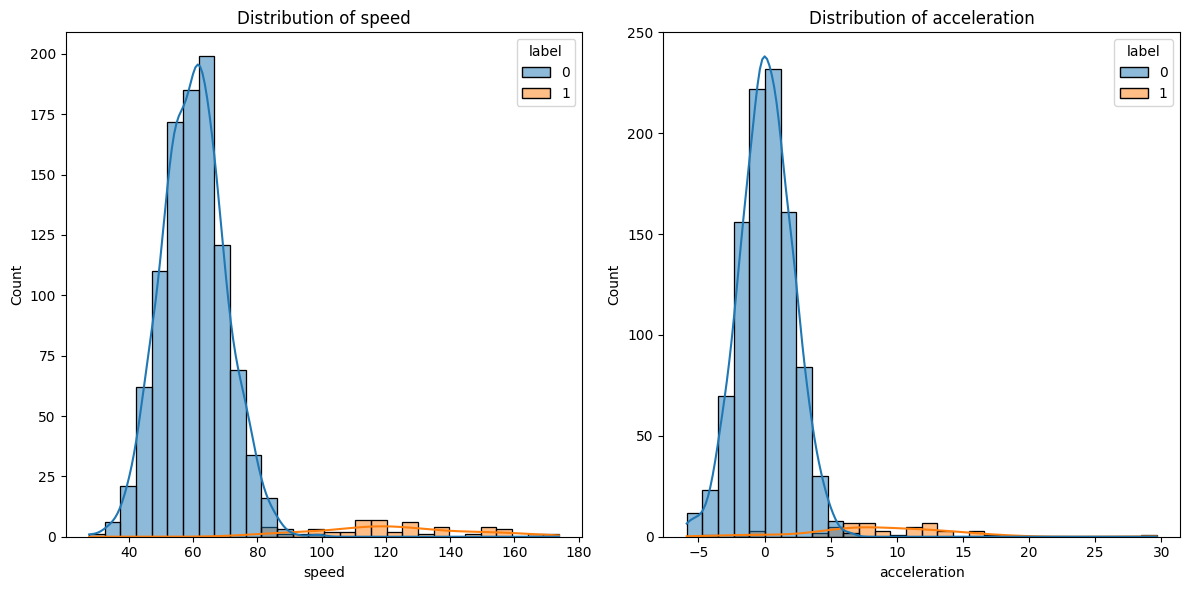

In [19]:
def plot_data_distribution(df):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(['speed', 'acceleration']):
        plt.subplot(1, 2, i+1)
        sns.histplot(data=df, x=col, hue='label', kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_data_distribution(df)

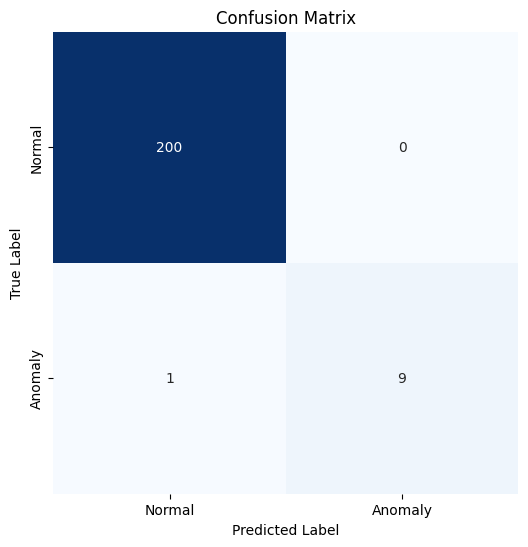

In [20]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Normal', 'Anomaly'])

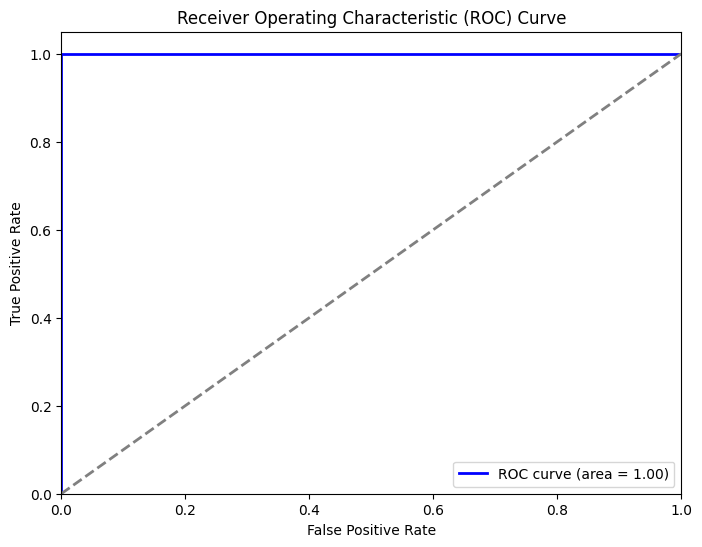

In [21]:
def plot_roc_curve(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

y_score = model.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_score)

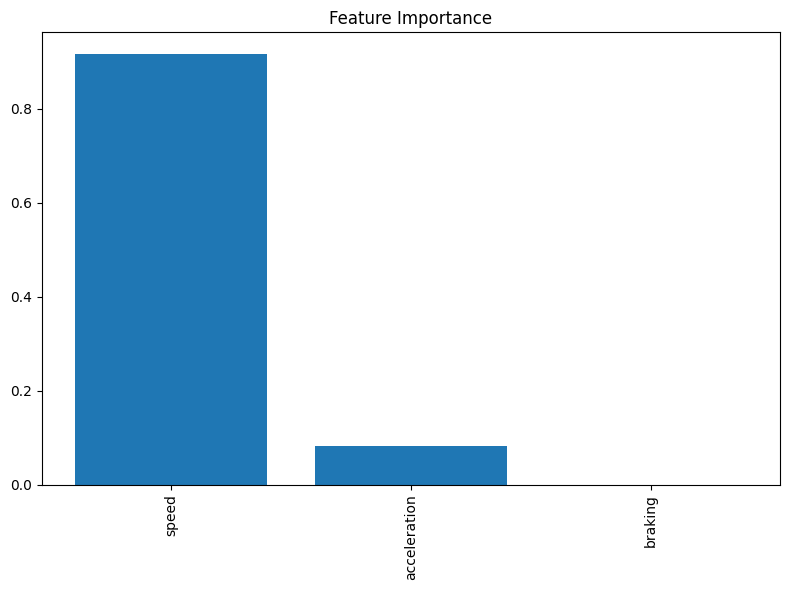

In [22]:
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(8, 6))
    plt.title('Feature Importance')
    plt.bar(range(len(indices)), importance[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model, X.columns)


In [24]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       200
     Anomaly       1.00      0.90      0.95        10

    accuracy                           1.00       210
   macro avg       1.00      0.95      0.97       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
 [[200   0]
 [  1   9]]
